In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams["figure.figsize"] = [20, 5]

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/vgsales/vgsales.csv


In [2]:
df  = pd.read_csv('../input/vgsales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


# **DATA CLEANING

[](http://)We start our analysis with some basic housekeeping.
To assess proper data quality we will carry out the following steps:
1. Explore missing data.
2. Assess ways to fix the missing values or drop the rows if unable.


>  Data cleaning

In [3]:
df.isnull().sum() 

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

We (happily) see that only one column contains null values! The next, proper course of action is to retrieve and explore the rows corresponding to null entries in the publisher column.

More often than not, a null value signals deeper input issues that require attention.

In [4]:
null_df = df[df.isnull().any(axis=1)]
null_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4569,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
4570,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
4605,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4653,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4664,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.30,0.11,0.00,0.01,0.42
4734,6439,Sonic X: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.19,0.07,0.00,0.00,0.27
4741,6564,Dora the Explorer: Game Boy Advance Video Volu...,GBA,2004,Misc,NaN,0.18,0.07,0.00,0.00,0.26
4747,6650,Cartoon Network Collection: Game Boy Advance V...,GBA,2004,Misc,NaN,0.18,0.07,0.00,0.00,0.25
4755,6851,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.17,0.06,0.00,0.00,0.24
4774,7210,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.16,0.06,0.00,0.00,0.22


We see problems with several other columns as well.

Firstly, in the biggest extent of the columns JP_Sales, Other_Sales we see zeroes. Perhaps this means that the game has not been released in Japan or other countries. Perhaps, there is no sales data recorded for these regions. 

We can only assume...

Furthermore, the platform that contains missing publisher values often is GBA and the year 2004. 

Additionally, in all of these entries but one, we encounter the 'misc' generalization in the Genre column.

These entries consist of bad data. We should consider dropping them.  Apart from the GBA titles, we also see a prevailing number of zeroes in the sales columns for the other platforms. 

Taking all these into account, it is clear that,  the sales volumes constitute small numbers that won't make a significant impact on total sales  if dropped.



In [5]:
df.dropna(axis = 0, inplace = True)
null_df = df[df.isnull().any(axis=1)]

There we go! No more null values in our dataset. Are we, therefore, free to move on with the fun stuff ??

Not quite ...
                                                                                                        
Because a value is not null, it doesn't necessarily mean it has indeed been recorded.

Data input is quite often been carried out not by tech-savvy professionals not familiar with the data - science world. For them, a null value may mean the same as a zero value!

We must also consider zero sales figures as null. 

But still. What if some games had totally flopped and not recorded any sales for real? 

We need to explore the data further to find out ...

In [6]:
zero_sales = df[['Global_Sales','JP_Sales','EU_Sales','NA_Sales']].loc[df['JP_Sales'] == 0.00].sum()
zero_sales

Global_Sales    3506.53
JP_Sales           0.00
EU_Sales        1032.93
NA_Sales        2136.31
dtype: float64

In [7]:
zero_sales = df[['Global_Sales','JP_Sales','EU_Sales','NA_Sales']].loc[df['NA_Sales'] == 0.00]
zero_sales.sum()

Global_Sales    609.63
JP_Sales        502.22
EU_Sales         83.78
NA_Sales          0.00
dtype: float64

In [8]:
zero_sales = df[['Global_Sales','JP_Sales','EU_Sales','NA_Sales']].loc[df['EU_Sales'] == 0.00]
zero_sales.sum()

Global_Sales    887.14
JP_Sales        537.72
EU_Sales          0.00
NA_Sales        298.37
dtype: float64

In [9]:
zero_sales = df[['Global_Sales','JP_Sales','EU_Sales','NA_Sales']].loc[df['Global_Sales'] == 0.00]
zero_sales.sum()

Global_Sales    0.0
JP_Sales        0.0
EU_Sales        0.0
NA_Sales        0.0
dtype: float64

Good news indeed! The zero sales numbers appear zero for countries the game has not been released in. 

We arrive at this conclusion because of the fact that there are no zeroes in the Global_Sales numbers. Furthermore, looking at each region separately, we see that there is no more than one region with zero sales recorded at an instance.

Keep in mind that in the null values data frame we dropped, we had instances where we had zeroes in all regions and nulls in the publisher column( e.g. entry 6105).

So, in the end, we need no further drops and can confidently carry on trusting our data deeper!!

> Data Transformation

The only obvious transformation at first glance is the decimal format in the year column, is a pain in the eyes! Let's fix it :


In [10]:

df['Year'] = df['Year'].apply(lambda x: int(x))
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [11]:
1 - 0.21885813148788927

0.7811418685121108

# **DATA EXPLORATION

Let's do some basic Data exploration asking questions and getting answers from the data.

Some interesting insights we can get are:

1. The top 5 best selling platforms 
2. The top 50  best selling games of all time
3. The top 5 best selling platforms
4. Gaming profiles by Regions. What Genre do they play? What platform has dominated?



> The top 5 Best - selling platforms of all time

In [12]:
df[['Platform', 'Global_Sales']].groupby(['Platform']).sum().sort_values(by = 'Global_Sales', ascending = False).head(5)

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91


Sony and Nintendo enjoy two entries in the platforms with the highest-grossing game sales of all time. 

There is, however, a catch that skews the data in favor of older generation platforms. 

The current-gen platforms are not over their lifespan yet, which means sales keep increasing.

On the other hand,  Xbox 360 and PS2/PS3  have been around for more than a decade and still carry on sales up to this day.

In this sense, comparing inter - gen consoles is a lot like comparing apples to pears. It does not hold significant validity and should be fine for informatory purposes, but does not hold significant scientific validity.

> The top 50 best selling games of all time

In [29]:
df[['Name', 'Global_Sales','Platform']].groupby(['Name']).sum().sort_values(by = 'Global_Sales', ascending = False).head(10)

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Modern Warfare 3,30.83
New Super Mario Bros.,30.01


Wow! It seems that Nintendo is dominating the home video games space from the Dawn of time --AKA the mid-'80s!

Video gaming has mostly remained a kid's and family market as we can see. The highest-grossing games have focused on kids and family fun. 

Only 3 out of 10 titles (CoD's and GTA V) target older demographics.  Wii Sports and Mario Kart Wii are targeted towards family and party fun and the rest, except for Tetris, for young ages.

The formula to create a blockbuster game, eventually, seems to be simple:

Aim for fun interactions between family members and target primarily the kids!

What is also interesting, is that the complexity and development challenge for such games is lower than AAA titles like CoD and GTA.

This proves that ideas and market segmentation in video game design are more important than complexity!

In [14]:

games_10_sales = df[df['Global_Sales'] > 10].sort_values(by = 'Global_Sales', ascending = False).head(15)

fig = px.bar(games_10_sales, x="Year", y="Global_Sales", color="Name", title="Games with more than 10 million sales", width=1300, height=500)
fig.show()

In [15]:
games_10_sales.groupby(['Platform','Year','Name']).sum('Global_Sales').sort_values(by = 'Global_Sales',ascending = False).head(5)

Rank  NA_Sales  EU_Sales  JP_Sales  \
Platform Year Name                                                           
Wii      2006 Wii Sports                   1     41.49     29.02      3.77   
NES      1985 Super Mario Bros.            2     29.08      3.58      6.81   
Wii      2008 Mario Kart Wii               3     15.85     12.88      3.79   
         2009 Wii Sports Resort            4     15.75     11.01      3.28   
GB       1996 Pokemon Red/Pokemon Blue     5     11.27      8.89     10.22   

                                        Other_Sales  Global_Sales  
Platform Year Name                                                 
Wii      2006 Wii Sports                       8.46         82.74  
NES      1985 Super Mario Bros.                0.77         40.24  
Wii      2008 Mario Kart Wii                   3.31         35.82  
         2009 Wii Sports Resort                2.96         33.00  
GB       1996 Pokemon Red/Pokemon Blue         1.00         31.37

>  Top (5) Best - Selling Genres

In [16]:
df[['Rank','Genre','Global_Sales']].groupby(['Genre']).sum().sort_values(by = 'Global_Sales',ascending = False).head(5)

,Rank,Global_Sales
Genre,,
Action,25939351,1722.83
Sports,17105195,1309.24
Shooter,9399409,1026.20
Role-Playing,11809615,923.79
Platform,6019939,829.13


When it comes to best selling genres, we see that Action-packed games, gross the highest. 

But what is an action game? Let's dig a bit to which high grossing titles are classified as 'action' to get a deeper insight



In [17]:
df[df['Genre'] == 'Action'].sort_values(by = 'Global_Sales', ascending = False).head(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14238,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
4408,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
14239,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2805,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
2324,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
14784,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
9754,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
8324,52,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
8325,57,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
13587,83,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24


Clearly, there has been some misunderstanding !!

We see that high grossing platform and sports games have been registered as 'Action'. Super Mario Bros should have been registered as 'Platform' and Wii Sports or Wii Fit should fall under the Sports category. 

Moreover, the 'action' classification should not have been used at all. It is merely an umbrella term encompassing multiple Genres like shooters, fighting games, etc. 

Mismatching genres in such a magnitude constitute data exploration impossible as data corruption will skew any results.


Now, Let's Switch to gaming profiles according to Region

In [18]:
#Create a new dataframe with the European Sales dropping games not released in Europe
EU_only_sales = df[['EU_Sales','Genre','Platform','Publisher','Name']]
EU_only_sales = EU_only_sales[EU_only_sales['EU_Sales'] > 0]
EU_only_sales.groupby([ 'Genre', 'Platform', 'Publisher', 'Name']).sum('EU_Sales').sort_values(by = 'EU_Sales', ascending = False).head(10)

,,,,EU_Sales
Genre,Platform,Publisher,Name,
Sports,Wii,Nintendo,Wii Sports,29.02
Racing,Wii,Nintendo,Mario Kart Wii,12.88
Sports,Wii,Nintendo,Wii Sports Resort,11.01
Simulation,DS,Nintendo,Nintendogs,11.00
Action,PS3,Take-Two Interactive,Grand Theft Auto V,9.27
Misc,DS,Nintendo,Brain Age: Train Your Brain in Minutes a Day,9.26
Platform,DS,Nintendo,New Super Mario Bros.,9.23
Misc,Wii,Nintendo,Wii Play,9.20
Role-Playing,GB,Nintendo,Pokemon Red/Pokemon Blue,8.89


The first thing we notice is the complete dominance of Nintendo in the European market ( or in every market in the data frame as we shall see). All dominant platforms in the EU market belong to Nintendo who also owns the highest-grossing games.

Perhaps, this raises a significant insight. Marrying console and game makes optimal delivery to the consumer. Marketing coupling between medium and product may signify high ROI's and market segmentation on the console/games level yields the optimal.

For example, whereas Xbox or the PS make mostly for individual gaming, Nintendo can market consoles and games together for the whole family and kids. 

Once families are locked into the Nintendo ecosystem, it becomes easier to sell games accustomed to the specific demographic the ecosystem encompasses.

Moreover, party games such as Wii Sports encourage shared buying of the console and games both within a family, as well as individuals sharing living spaces. 

This makes it easier to sell higher volumes and lowers the potential buyer's remorse.

In [19]:
#Create a new dataframe with the Japanese Sales dropping games not released in Japan
Jp_only_sales = df[['JP_Sales','Genre','Platform','Publisher','Name', 'Rank']]
Jp_only_sales = Jp_only_sales[Jp_only_sales['JP_Sales'] > 0]
Jp_only_sales.groupby(['Rank',  'Genre', 'Platform', 'Publisher', 'Name']).sum('JP_Sales').sort_values(by = 'JP_Sales', ascending = False).head(10)

,,,,,JP_Sales
Rank,Genre,Platform,Publisher,Name,
5,Role-Playing,GB,Nintendo,Pokemon Red/Pokemon Blue,10.22
13,Role-Playing,GB,Nintendo,Pokemon Gold/Pokemon Silver,7.20
2,Platform,NES,Nintendo,Super Mario Bros.,6.81
7,Platform,DS,Nintendo,New Super Mario Bros.,6.50
21,Role-Playing,DS,Nintendo,Pokemon Diamond/Pokemon Pearl,6.04
27,Role-Playing,DS,Nintendo,Pokemon Black/Pokemon White,5.65
26,Role-Playing,GBA,Nintendo,Pokemon Ruby/Pokemon Sapphire,5.38
42,Simulation,DS,Nintendo,Animal Crossing: Wild World,5.33
28,Puzzle,DS,Nintendo,Brain Age 2: More Training in Minutes a Day,5.32


Japan has always been a different beast on its own! 

Although we see many similarities between the European and North American markets, Japan has been mostly dominated Pokemon!

Why the Pokemon phenomenon has struck such a nerve within the Japanese market could constitute a qualitative study on its own and is far beyond the scope of this analysis. 

In [20]:
#Create a new dataframe with the North America Sales dropping games not released in North America
NA_only_sales = df[['NA_Sales','Genre','Platform','Publisher','Name', 'Rank']]
NA_only_sales = NA_only_sales[NA_only_sales['NA_Sales'] > 0]
NA_only_sales.groupby(['Rank',  'Genre', 'Platform', 'Publisher', 'Name']).sum('NA_Sales').sort_values(by = 'NA_Sales', ascending = False).head(10)

,,,,,NA_Sales
Rank,Genre,Platform,Publisher,Name,
1,Sports,Wii,Nintendo,Wii Sports,41.49
2,Platform,NES,Nintendo,Super Mario Bros.,29.08
10,Shooter,NES,Nintendo,Duck Hunt,26.93
6,Puzzle,GB,Nintendo,Tetris,23.20
3,Racing,Wii,Nintendo,Mario Kart Wii,15.85
4,Sports,Wii,Nintendo,Wii Sports Resort,15.75
16,Misc,X360,Microsoft Game Studios,Kinect Adventures!,14.97
9,Platform,Wii,Nintendo,New Super Mario Bros. Wii,14.59
8,Misc,Wii,Nintendo,Wii Play,14.03


How do sales develop according to Year ?

Text(0.5, 1.0, 'Sales developement through the years')

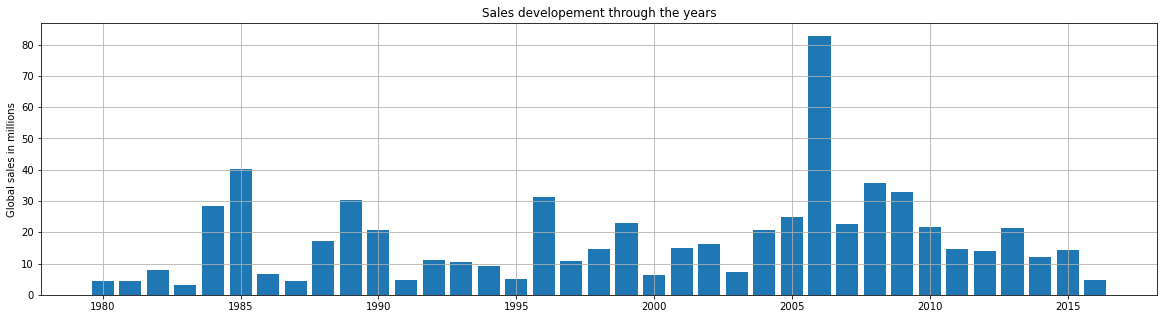

In [21]:
y = df['Global_Sales']
x = df['Year']
plt.bar(x , y)
plt.ylabel('Global sales in millions')
plt.grid()
plt.title('Sales developement through the years')



Contrary to the general belief that video gaming has moved on to older audiences as gamers matured and this has helped skyrocket the industry, we see, sales distribution through time has been a case of ups and downs.

We can pinpoint the years 2005 to 2010 as the most profitable run in recent game history. 

We also see that suprisingly enough, game sales have been on the decline on total in the most recent years. 

Are gamers not that much inclined to buy new games as years go by? Perhaps, the market is getting saturated and the great variety on offerings diminish hypes for new releases.

Or perhaps, modern DLC and paywall monetisation schemes alienate gamers.




There are 4 outliers in the global sales vs year graph above. The years 1985, 1989, 1996, and 2006 consist of releases that have sent sales through the roof!

I guess that the 1985 release that has achieved as such is Super Mario Bros.  Can you guess the other three?


In [22]:
df[df['Year'].isin(['1985','1989','1996','2006'])].sort_values(by= 'Global_Sales', ascending = False).head(4)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6112,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
705,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
188,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


Wii Sports is the highest-grossing video game of all time by far! Super Mario Bros. which many of us mistakenly considered the most selling one, comes second with half the sales numbers. Pokemon and Tetris follow suit almost tied in the 3rd and 4th place.


Text(0, 0.5, 'Global sales in millions')

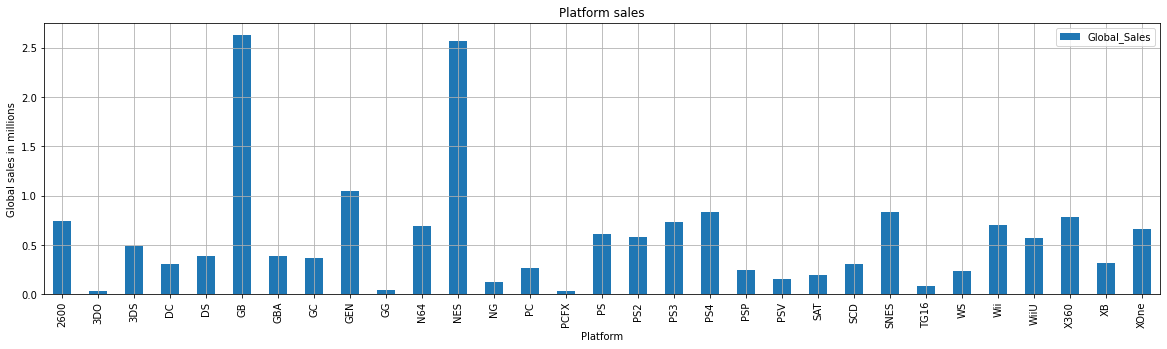

In [23]:
#Group Global_Sales into Genres and then plot global sales
Global_Sales_df = df[['Platform','Global_Sales']]
Global_Sales_df.groupby(['Platform']).mean('Global_Sales').plot.bar()
plt.grid()
plt.title('Platform sales')
plt.ylabel('Global sales in millions')

In this graph, we see that retro gaming sales were the highest point the industry ever achieved. In particular, NES and GameBoy have made waves unsurpassed by any other platform or console generation.

We also see, with regards to Sony platforms, Playstation has been gaining steady, ever-increasing popularity, whereas Microsoft has faced ups and downs with the Xbox Platform.

Perhaps, this is more a case of the popularity of the video games released in those Platforms themselves, rather than the medium.

Sony has found the wave to the consumer's heart whereas Microsoft was lacking behind in great releases ...

Let's have a deeper look at the battle between these two rivals.



In [24]:

sony_vs_microsoft = df[['Name','Platform','Publisher','Global_Sales']]
sony_vs_microsoft = sony_vs_microsoft[sony_vs_microsoft['Platform'].isin(['PS2', 'XB','PS3','PS','XOne','X360'])].sort_values(by = 'Global_Sales', ascending = False).head(50)
grossing_games  = sony_vs_microsoft[sony_vs_microsoft['Name'].isin(['Gran Turismo','Gran Turismo 2','Gran Turismo 3: A-Spec','Gran Turismo 4','Gran Turismo 5', 'Uncharted 2: Among Thieves',
'Uncharted 3: Drake\'s Deception','Gears of War 2', 'Halo 2', 'Halo 3', 'Halo 4'])].groupby(['Platform','Name']).sum('Global_Sales')
grossing_games



Global_Sales
Platform Name                                        
PS       Gran Turismo                           10.95
         Gran Turismo 2                          9.49
PS2      Gran Turismo 3: A-Spec                 14.98
         Gran Turismo 4                         11.66
PS3      Gran Turismo 5                         10.77
         Uncharted 2: Among Thieves              6.73
         Uncharted 3: Drake's Deception          6.83
X360     Gears of War 2                          6.76
         Halo 3                                 12.14
         Halo 4                                  9.76
XB       Halo 2                                  8.49

We see now, the Xbox vs Playstation exclusives battle leans heavily over the Playstation side when it comes to the top 50 highest selling games. 

It is clear, exclusives are the driving force behind console adaptation on the market and Sony has been steps ahead of Nintendo to ensure as such.

>  Top - Selling Publishers

It will be interesting to see what is the distribution of worldwide sales historically amongst publishers regarding the top 100 highest-grossing games.

By now, everybody expects Nintendo to have dominated the 80's and 90's until the upsurge of the Playstation and Xbox platforms.  We would expect the market to become more and more segmented as we move towards the present with Nintendo falling behind in the late '00s

Text(0.5, 1.0, 'Historical global sales by publisher')

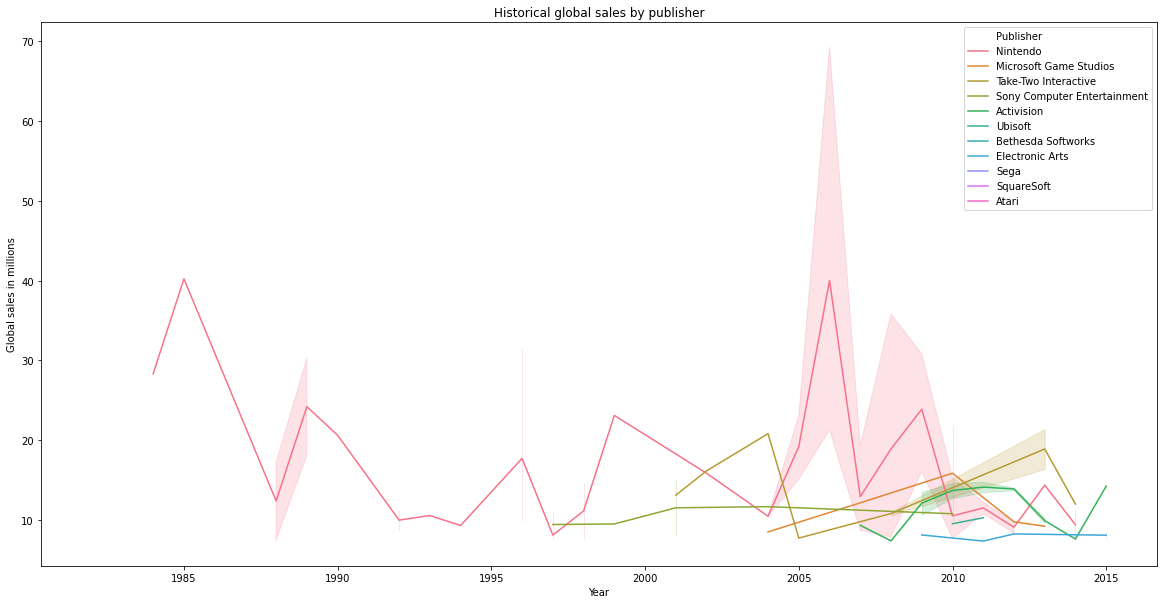

In [25]:
sales_df = df[['Year','Global_Sales','Publisher']].sort_values(by = 'Global_Sales', ascending= False).head(100)

plt.figure(figsize=(20,10))
sns.lineplot(data = sales_df, x = sales_df['Year'], y = sales_df['Global_Sales'], hue='Publisher')
plt.ylabel('Global sales in millions')
plt.title("Historical global sales by publisher")

Indeed, things turn out as expected! Nintendo has dominated game sales for three decades. Up until the gradual fall of Wii sports and the Wii platform in general.

It is also interesting that Sega, despite the aggressive marketing campaigns,  painted a bigger picture of itself than the numbers suggest. Globally, when it comes to the 100 highest-grossing games in history, its presence is menial.


This has paved the way for the rise of the present-day giant publishers like Activision or Ubisoft, as well as, Take-Two Interactive with the one-hit wonder: GTA

There steems another important message from these results. As games tend to copy one-another and the genres become more standardized like Shooters or third-person shooters, the lack of innovative ideas and concepts (like the Wii Platform and Wii sports) keep the industry stale and in decline. 

The contenders fight for an ever-decreasing market pie and each new title similar to all the previous, however the small sales boost, saturates the market even more. 



It is now time, to throw Nintendo out of the equasion so we can focus on the more menial players.

The next diagram shows the publishers that have achieved more than 4 million sales and how they stack against each other in terms of total sales.




Text(0.5, 1.0, 'Global sales by publisher')

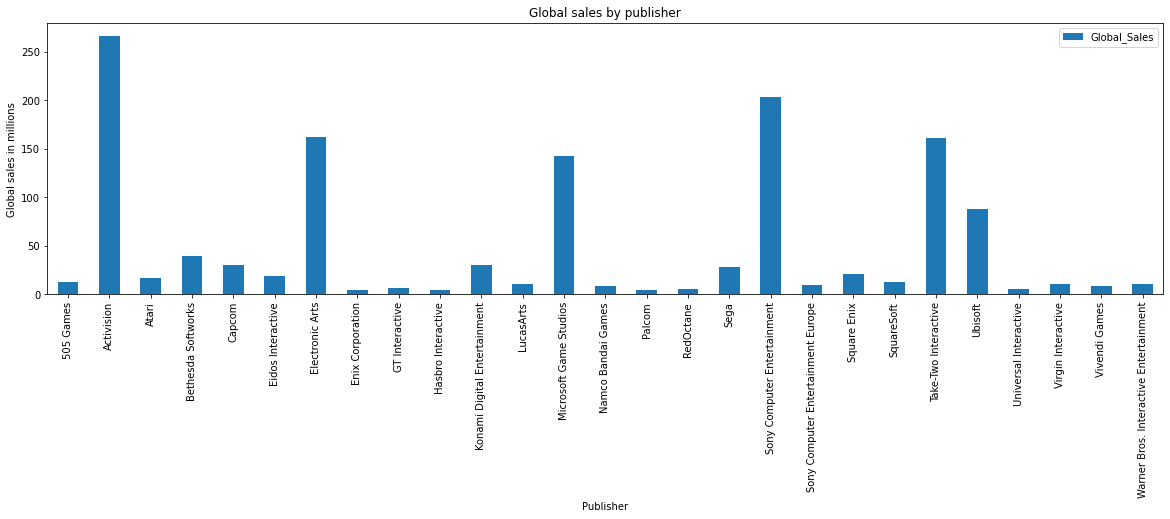

In [26]:
Top_Publishers = df[df['Publisher'].str.contains('Nintendo')==False]
Top_Publishers = Top_Publishers[Top_Publishers['Global_Sales'] >= 4]
Top_Publishers = Top_Publishers[['Publisher', 'Global_Sales']]
Top_Publishers.groupby('Publisher').sum().plot.bar()
plt.ylabel('Global sales in millions')
plt.title("Global sales by publisher")

There is an important message in this graph. Taking Nintendo out of the frame, we see that modern-day gaming comes into focus. 

We see that the prevailing categories in global sales are shooters (first and third person), action games (like Assasin's Creed), and sports (Mainly Electronic Arts). This is easily concluded as the strongest publishers in this graph ( e.g. Microsoft, Activision, or Ubisoft) focus primarily in these categories.

We also, for the first time see Sega coming into play as it is no longer dwarfed by Nintendo.

It is fair to say, after the diminishing of Nintendo innovations, the gaming industry has become more standardized in its offerings.

In a way, the publishers try to brute-force each other battling in the same standardized Genres.

Perhaps, this has given rise to the battle for ever greater horsepower under the hood in modern Consoles, instead of innovations in areas like player experience.

Nintendo has strongly proven that this approach is not a guarantee for higher sales. In almost all instances, its hardware has always been inferior to the competition. Gaming experiences, however, have always been what made the bang and bucks.

Now, let us have a look into the Sales numbers for each region

Text(0, 0.5, 'Global sales in millions')

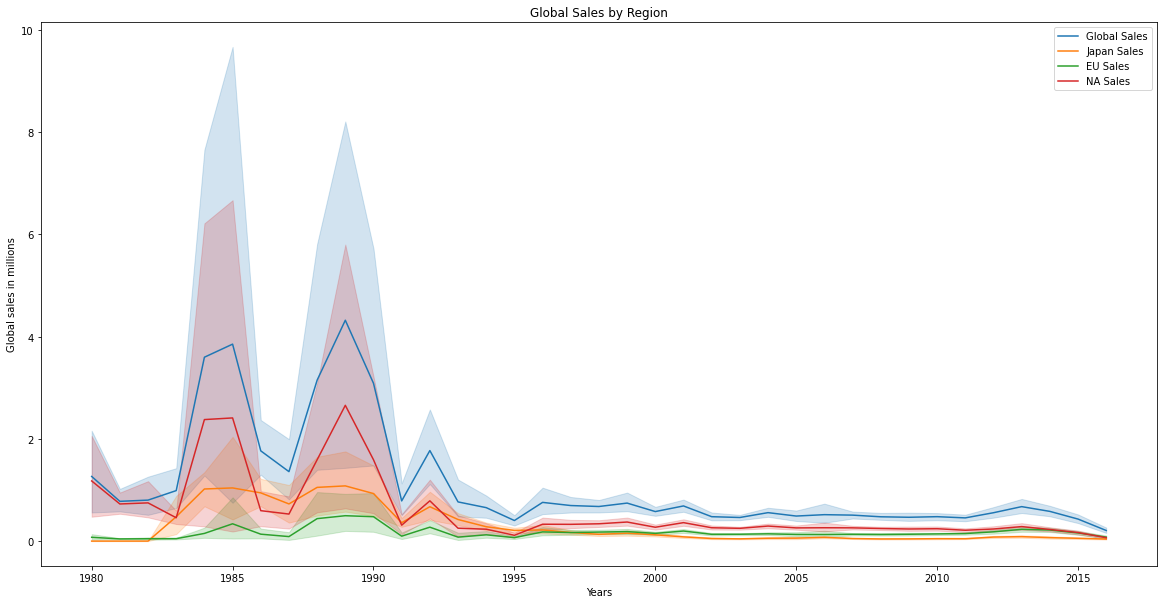

In [27]:
plt.figure(figsize=(20,10))
plt.title("Global Sales by Region")
sns.lineplot(data = df[['Global_Sales','Year']], y = df['Global_Sales'], x = df['Year'], label = 'Global Sales' )
sns.lineplot(data = df[['JP_Sales','Year']], y = df['JP_Sales'], x = df['Year'], label = 'Japan Sales' )
sns.lineplot(data = df[['EU_Sales','Year']], y = df['EU_Sales'], x = df['Year'], label = 'EU Sales')
sns.lineplot(data = df[['NA_Sales','Year']], y = df['NA_Sales'], x = df['Year'], label = 'NA Sales' )
plt.xlabel("Years")
plt.ylabel('Global sales in millions')

There are the most interesting conclusions to be drawn here!

First of all, we have to keep in mind the demographics. On a macroscopic level, Japan's Population is smaller than the EU, which in turn is smaller than North America's.

Having said that, we see NA sales getting a head-start in the early 80's which can only be attributed to the introduction of Atari home entertainment.

Following on, we see the with the introduction of NES we see sales rise in all regions. The adoption of NES on the Japanese domestic market has been so successful, that in the early days, sales reached the North American numbers briefly.

At the year 1985 with the introduction of Super Mario, the console market peaks in Europe, and all game sales reach the first all-time high!

Afterward, as we have seen before, the rise of Tetris has propelled sales even more.

The final peak can be attributed to the rise of Pokemon in the late 90's where once again, Japan crosses North America in sales numbers.

Afterward, we see no such drastic ups and downs up to the present day. It seems that the Japanese market has never loved a publisher or console as much ever since, as  the sales numbers remain low compared to Europe and North America.

There is a considerable rise in sales at around the introduction of the present-day generation which, however, seems to be slowing down significantly.

All in all, the gaming market seems to homogenize completely as the years go by. This can all be clearly attributed to the rise of the internet and media globalization.

# **Conclusion

In this notebook, we have performed a study on gaming sales data throughout history.

The ultimate winner -by far- in the gaming wars throughout the years has been Nintendo.

Both highest grossing games, as well as, highest-grossing platforms are owned by Nintendo. This proves that platform-game coupling is the ultimate combination of market dominance.

Also, younger ages, as is the primary Nintendo market, appear to be the most profitable demographic. 

Furthermore, aiming for family fun boosts sales potentiality. It is a fact that though multiplayer gaming has been on the rise since the early days, physical interactions as encompassed in Wii Sports are more fun.

Lastly, we have seen that platform exclusives are the driving force behind a platform adaptation. Comparing Xbox versus PS games/console sales, this message becomes transparent. Not surprisingly, Microsoft has taken an offensive approach in incorporating game studios in an ultimate effort to beat Sony in the following gen-gaming wars.

Whatever the outcome, consumers seem ever less inclined to care!...

Diminishing game sales the last decade show that unless fresh ideas or novel gaming approaches come along,  the market may keep losing interest. 



Text(0, 0.5, 'Global sales in millions')

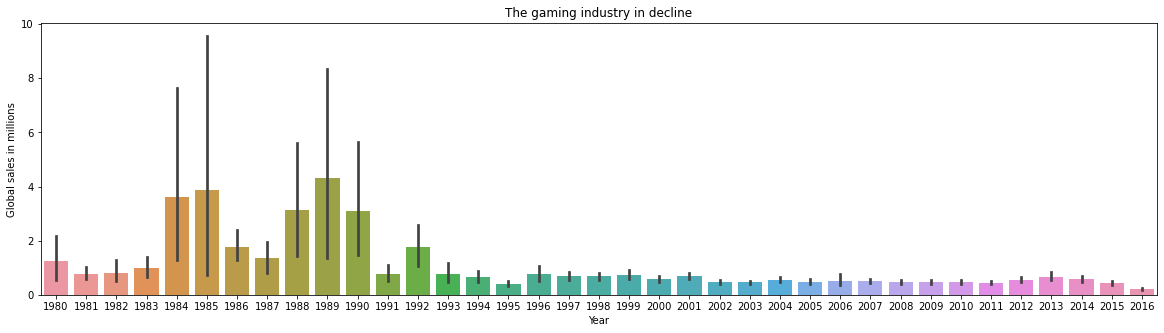

In [28]:
plt.title("The gaming industry in decline")

sns.barplot(x = df['Year'], y = df['Global_Sales'])
plt.ylabel('Global sales in millions')

All in all, the gaming industry has been steady, devoid of innovation throughout the years.

Super Mario Bros, Wii Sports, Pokemon, and Tetris prove that it is not graphics nor budget extravagations that make a hit. We clearly see that as budgets rose and the industry has been multinational, the sales have been decreasing.

Perhaps, what the industry needs nowadays, more than ever, is ideas and concepts! Long have we been playing the same game mechanics in different suits on different consoles. The variety in offerings is nowadays that huge, that nothing can create the hype that Nintendo managed to create back in the day.

We need more juice and not more stale eye-candy. We need more experiences and less repetition. Same old shall hold no more place in gaming ever-more.